In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

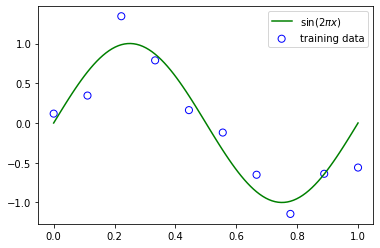

In [55]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

1. sample thêm 10 điểm dữ liệu cho tập valdiation
2. fit 3 model đa thức (bậc 1, bậc 3, bậc 9) cho dữ liệu trên, đánh giá mức độ underfitting, overfitting của 3 model và tính loss train/val.
3. thêm 100 dữ liệu vào tập train, model bậc 9 có còn overfitting.
4. chỉ dùng 10 dữ liệu cho tập train, fil model bậc 9 và dùng rigde regression để giảm overfitting

In [56]:
#1
x_val, y_val = create_toy_data(func, 10, 0.25)

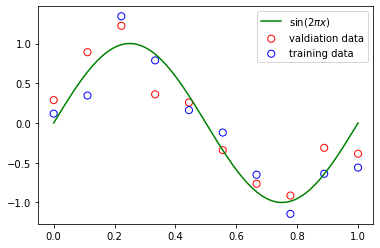

In [57]:
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [58]:
#2
def pre_process(x,num):
  x_new = np.ones((x.shape[0], 1)).reshape(-1,1)
  x = x.reshape(-1,1)
  # print(x.shape)
  # print(x_new.shape)
  for i in range(1,num+1):
    x_new = np.hstack((x_new, x**i))
    # print(x_new)
  return x_new

def mse(actual, predict):
  return np.sum(np.square(actual - predict))

In [59]:
x1=  pre_process(x_train,1)
x3= pre_process(x_train,3)
x9= pre_process(x_train,9)
x9.shape

(10, 10)

In [60]:
w1 = np.dot(np.linalg.inv(np.dot(x1.T,x1)), np.dot(x1.T,y_train))
w3 = np.dot(np.linalg.inv(np.dot(x3.T,x3)), np.dot(x3.T,y_train))
w9 = np.dot(np.linalg.inv(np.dot(x9.T,x9)), np.dot(x9.T,y_train))

In [61]:
x_dummy = np.linspace(0, 1, 100)
x1_pr=  pre_process(x_dummy,1)
x3_pr= pre_process(x_dummy,3)
x9_pr= pre_process(x_dummy,9)

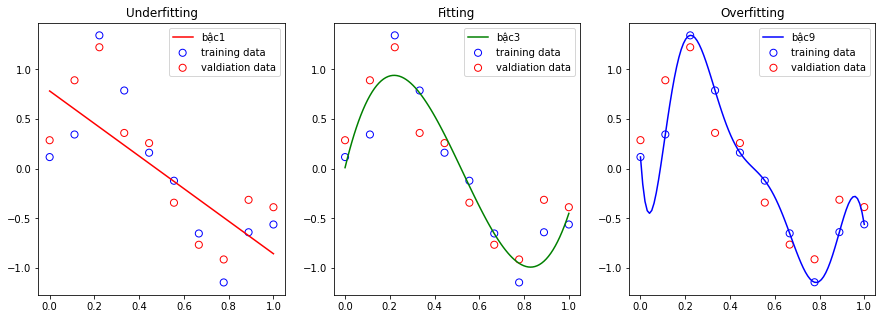

In [62]:
pre1 = np.dot(x1_pr, w1)
pre3 = np.dot(x3_pr, w3)
pre9 = np.dot(x9_pr, w9)
x_dummy = np.linspace(0, 1, 100)

plt.figure(figsize=(15,5))
plt.title("Đánh giá")
plt.subplot(131)
plt.title("Underfitting")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.plot(x_dummy,pre1, c="r", label="bậc1")
plt.legend()

plt.subplot(132)
plt.title("Fitting")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.plot(x_dummy,pre3, c="g", label="bậc3")
plt.legend()

plt.subplot(133)
plt.title("Overfitting")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.plot(x_dummy,pre9, c="b", label="bậc9")
plt.legend()
plt.show()

In [63]:
x1_val=  pre_process(x_val,1)
x3_val= pre_process(x_val,3)
x9_val= pre_process(x_val,9)

y1 = np.dot(x1_val, w1)
y3 = np.dot(x3_val, w3)
y9 = np.dot(x9_val, w9)

LOSS IN VAL

In [64]:
loss1 = (np.sum(y1-y_val))**2/x_val.shape[0]
loss3 = (np.sum(y3-y_val))**2/x_val.shape[0]
loss9 = (np.sum(y9-y_val))**2/x_val.shape[0]
print("loss bậc 1: {}\nloss bậc 3: {}\nloss bậc 9: {}\n".format(loss1,loss3,loss9))

loss bậc 1: 0.04381529697226251
loss bậc 3: 0.04381529697221991
loss bậc 9: 0.04374519304129626



LOSS IN TRAIN

In [65]:
y1_train = np.dot(x1, w1)
y3_train = np.dot(x3, w3)
y9_train = np.dot(x9, w9)

loss1_train = (np.sum(y1_train-y_train))**2/x_train.shape[0]
loss3_train = (np.sum(y3_train-y_train))**2/x_train.shape[0]
loss9_train = (np.sum(y9_train-y_train))**2/x_train.shape[0]
print("loss bậc 1: {}\nloss bậc 3: {}\nloss bậc 9: {}\n".format(loss1_train,loss3_train,loss9_train))

loss bậc 1: 6.039716305598372e-32
loss bậc 3: 1.0376851683939326e-26
loss bậc 9: 2.806381008000742e-08



In [66]:
X_train_9= pre_process(x_train,9)

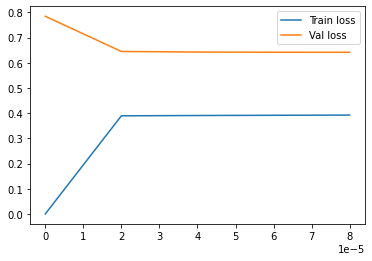

In [67]:
train_loss = {}
val_loss = {}

for i in np.arange(0, 0.0001, 0.00002):
  w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9) + np.identity(X_train_9.shape[0])*i), np.dot(np.transpose(X_train_9),y_train))
  pred_9 = np.dot(X_train_9,w)
  train_loss[i] = np.sum((y_train-pred_9)**2)
  pred_val_9 = np.dot(pre_process(x_val,9),w)
  val_loss[i] = np.sum((y_val-pred_val_9)**2)

plt.plot(list(train_loss.keys()), list(train_loss.values()), label = 'Train loss')
plt.plot(list(val_loss.keys()), list(val_loss.values()), label = 'Val loss')
plt.legend()

In [68]:
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9) + np.identity(X_train_9.shape[0]) \
                         * list(val_loss.keys())[np.argmin(list(val_loss.values()))]) \
                          , np.dot(np.transpose(X_train_9),y_train))

In [69]:
x_dummy = np.linspace(0, 1, 100)
X_dummy = pre_process(x_dummy, 9)
predict = np.dot(X_dummy,w)

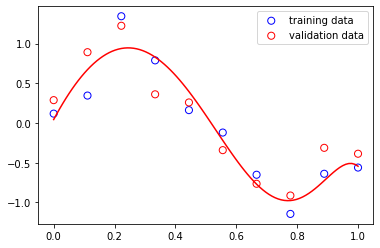

In [70]:
plt.plot(x_dummy, predict, 'r')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [71]:
pred_9 = np.dot(X_train_9,w)
loss_9 = mse(y_train,pred_9)
pred_val_9 = np.dot(pre_process(x_val,9),w)
loss_val_9 = mse(y_val,pred_val_9)
print('Loss in training set: {}'.format(loss_9))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 0.39240768123102004
Loss in validation set: 0.6417220341840942


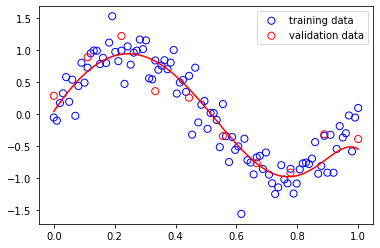

In [74]:
plt.plot(x_dummy, predict, 'r')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

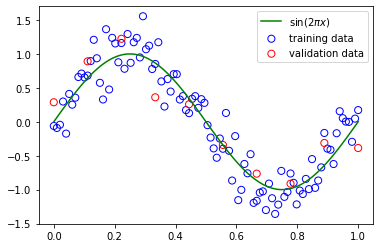

In [75]:
x_train, y_train = create_toy_data(func, 100, 0.25)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()